# Decision Tree example - Classification

- **Purpose:** Predict type of plant
- **Data:** Iris Dataset. For more info follow <a href="https://archive.ics.uci.edu/ml/datasets/iris" target="_blank">this link</a> 
- **Author:** Emily Diaz
- **Date:** October 6th of 2020 

Process steps: 
1. [Import modules](#importmod)
2. [Load data](#loaddata)
3. [Profiling](#profiling)
4. [Data prep](#dataprep)
5. [Modeling](#modeling)


Useful links: 
- https://towardsdatascience.com/baby-steps-towards-data-science-decision-tree-regression-in-python-323beeacbb6e
- https://scikit-learn.org/stable/modules/tree.html
- https://www.datasciencecentral.com/profiles/blogs/introduction-to-classification-regression-trees-cart#:~:text=A%20simple%20example%20of%20a,be%20split%20no%20more%3B%20and
- https://en.wikipedia.org/wiki/Decision_tree_learning
- https://sefiks.com/2018/08/27/a-step-by-step-cart-decision-tree-example/

# What is a Decision Tree

<img src="./img/DT_example.png" />

Decision Tree is a *Supervised Learning* technique that can be used for **classification and regression** problems. The most popular type is called **CART** (Classification and Regression Trees). The algorithm is structured as a sequence of questions, that returns a tree like structure where the ends are terminal nodes at which point there are no more questions and we get the final result (category or numeric) for that set of characteristics.

The metric that it considers to find the best split is **GINI impurity**, which is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. 

Other important characteristics of this method are: 
- CART is nonparametric and therefore does not rely on data belonging to a particular type of distribution
- CART is not significantly impacted by outliers in the input variables
- CART can use the same variables more than once in different parts of the tree.  This capability can uncover complex interdependencies between sets of variables
- Is the base for more complex ensemble and boosting methods such as Random Forest and GBM

Disadvantages: 
- Trees are very sensitive to small change in the training data leading to significant changes on final predictions (robustness issue)
- They tend to overfit (can be solved with pruning)

***

<a id="importmod"></a>
## 1. Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # to create decision tree
from sklearn import tree # to plot tree
from sklearn.model_selection import GridSearchCV # for parameter tuning
from sklearn.metrics import accuracy_score # For model accuracy 
from sklearn.datasets import load_iris # iris dataset
from sklearn.model_selection import train_test_split # train/test split
from sklearn.metrics import classification_report # classification report
from sklearn.metrics import plot_confusion_matrix # confusion matrix

In [2]:
# Random seed: to always get the same results/reproducibility
random_seed =42

<a id="loaddata"></a>
## 2. Load data

Data already comes divided by train and test

In [3]:
iris = load_iris()
X = pd.DataFrame(iris.data[:, :], columns = iris.feature_names[:])
y = pd.DataFrame(iris.target, columns =["Species"])

<a id="profiling"></a>
## 3. Profiling

For more info about this package, follow <a href="https://github.com/pandas-profiling/pandas-profiling" target="_blank">this link</a> 



In [4]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<a id="dataprep"></a>
## 4. Data Prep

### Train/test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


<a id="modeling"></a>
## 5. Modeling

In [7]:
# Initialize decision tree (with default parameters)
dt_model = DecisionTreeClassifier(random_state=random_seed)

In [8]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

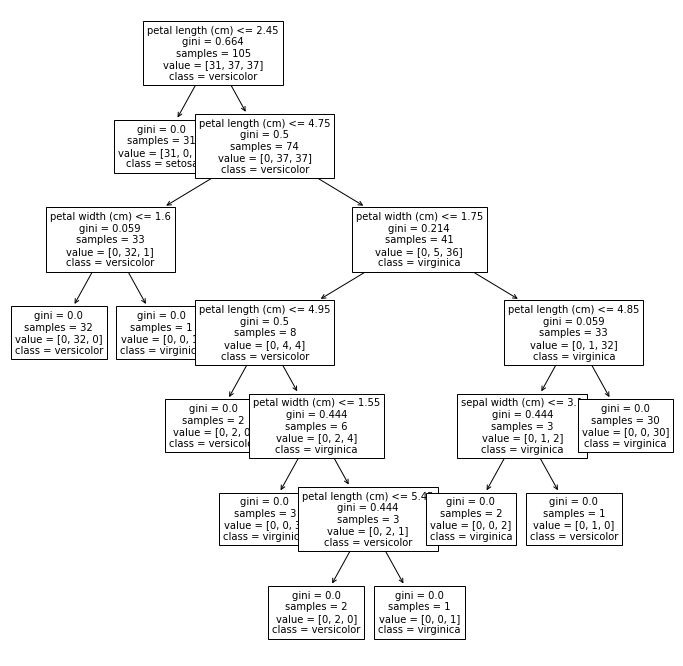

In [9]:
# Show plot
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(dt_model, fontsize=10, feature_names=X.columns, class_names=iris.target_names)
plt.show()

### Report accuracy

In [10]:
y_pred = dt_model.predict(X_test)
accuracy_score(y_test, y_pred, normalize=True)

1.0

In [11]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



/Users/natashadiaz/opt/anaconda3/envs/ml_models/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


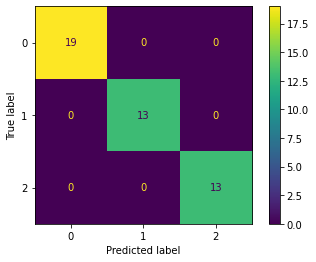

In [12]:
plot_confusion_matrix(dt_model, X_test, y_test)

### Variable importance plot

<AxesSubplot:>

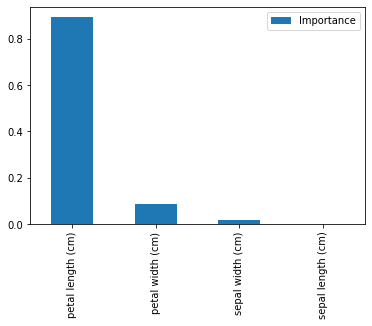

In [13]:
# Get importance
importance = dt_model.feature_importances_
# Adding name of cols
importance = pd.DataFrame(importance, index=X_train.columns, 
                          columns=["Importance"])

# Sort values
importance = importance.sort_values(by=['Importance'], ascending=False)

importance.plot.bar()

The plot tells us that **the most relevant variable is petal length with more than 80% of the relative importance.** RM represents ~60% of the relative importance. 

If we want to understand the sign of the effect, we can look at the splits and see the direction of each of them based on the decisions. 

### Parameter tuning and cross-validation

- Sklearn documentation regarding parameters: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
- Tutorial on how to tune: https://projector-video-pdf-converter.datacamp.com/6280/chapter5.pdf

 By tuning parameters, we can prune the tree and maximize the precision. We are going to use gridsearch, but there are other methods to tune (eg randomsearch)
 Some of the most relevant parameters to tune in a decision tree regressor are:
 - **maxdepth:** This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data
 - **min_samples_split:** The minimum number of samples required to split an internal node
 - **min_samples_leaf:** The minimum number of samples required to be at a leaf node
 - **max_features:** The number of features to consider when looking for the best split

In [14]:
# Check current parameters (default in this case as we didn't specify any)
print(dt_model.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [15]:
# Check current depth
dt_model.get_depth()

6

In [16]:
# Parameters to tune - ranges
params_dt = {
'max_depth': range(3,11),
'min_samples_leaf': [0.04, 0.06, 0.08],
'max_features': [0.2, 0.4,0.6, 0.8]
}

In [17]:
# Instantiate a 10-fold CV grid search object using ranges defined and type of scoring to decide best model
grid_dt = GridSearchCV(estimator=dt_model,
param_grid=params_dt,
scoring='accuracy',
cv=10,
n_jobs=-1) # -1 means using all processors.

In [18]:
# Estimate models - can take long depending on data size
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 11),
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             scoring='accuracy')

In [19]:
# Extract best hyperparameters
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 3, 'max_features': 0.8, 'min_samples_leaf': 0.04}


In [20]:
# Extract best CV score
best_CV_score = grid_dt.best_score_
best_CV_score

0.9436363636363637

In [21]:
# Extract best model
best_model = grid_dt.best_estimator_
# Evaluate test set accuracy
test_acc = best_model.score(X_test,y_test)
# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 1.000


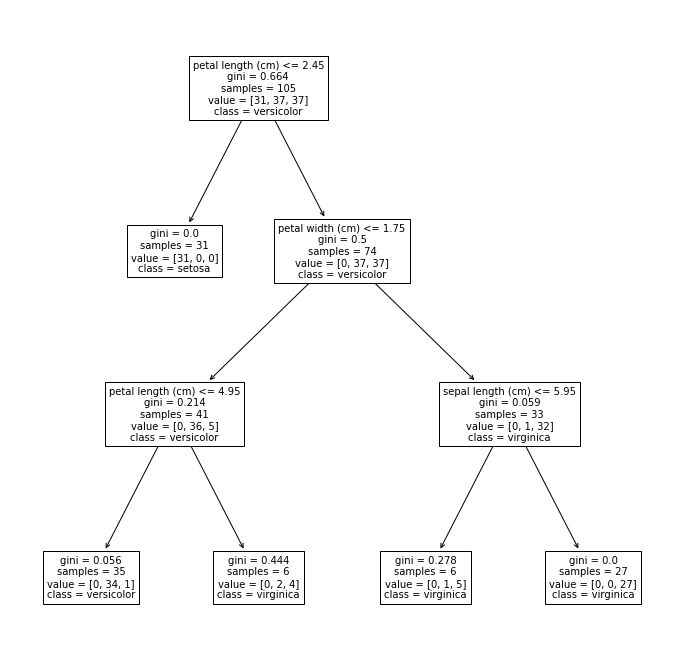

In [22]:
# Plot tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(best_model, fontsize=10, feature_names=X.columns, class_names=iris.target_names)
plt.show()

<AxesSubplot:>

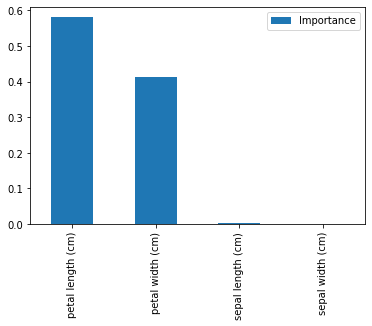

In [23]:
# Variable importance
importance = best_model.feature_importances_
# Adding name of cols
importance = pd.DataFrame(importance, index=X.columns, 
                          columns=["Importance"])

# Sort values
importance = importance.sort_values(by=['Importance'], ascending=False)

importance.plot.bar()

In conclusion, we can use the pruned version of the model as it gets same accuracy with a simple structure